## Problem Definition:

ConnectTel Telecom Company faces a critical challenge in addressing customer churn, which poses a significant threat to its business sustainability and growth. The company's current customer retention strategies lack precision and effectiveness, leading to the loss of valuable customers to competitors. To overcome this challenge, ConnectTel aims to develop a robust customer churn prediction system.

## Solution and Benefits:

As a Data Scientist, my role is pivotal in developing a comprehensive customer churn prediction system for ConnectTel. By leveraging advanced analytics and machine learning techniques on available customer data, I aim to accurately forecast customer churn and implement targeted retention initiatives.

## The benefits of this solution are multifold:

#### Reduced Customer Attrition:
By accurately predicting which customers are at risk of churning, ConnectTel can proactively intervene with tailored retention strategies, thereby reducing the overall rate of customer attrition.

#### Enhanced Customer Loyalty: 
Through targeted retention initiatives, ConnectTel can address the specific needs and concerns of at-risk customers, fostering stronger relationships and increasing customer loyalty over time.

#### Competitive Edge:
In the highly dynamic and competitive telecommunications industry, the ability to predict and prevent customer churn is paramount. By implementing a proactive approach to customer retention, ConnectTel can differentiate itself from competitors and maintain a competitive edge in the market.

Overall, the development of a robust customer churn prediction system will empower ConnectTel to better understand and anticipate customer behavior, ultimately driving business growth and ensuring long-term success in the telecommunications industry.







In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv(r"C:\Users\ifeyi\Downloads\Customer-Churn - Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#  To create a copy of the dataset
df2 = df.copy()
df2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


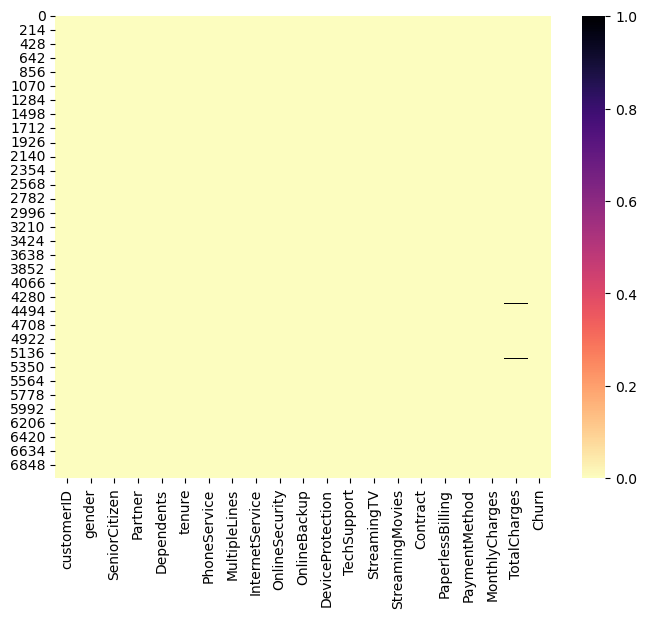

In [4]:

# Check for missing data
missing_data = df2.isnull().sum()

# To visualize missing data
plt.figure(figsize=(8,6))
sns.heatmap(df2.isnull(),cbar=True,cmap= "magma_r")
plt.show()


we can see that there are missing values by Totalcharges

In [5]:
# checking missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Replace missing values in TotalCharges with the median value
df2['TotalCharges'].fillna(1397.475000, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen: This variable has outliers, which could suggest that there are unusual or extreme values in the dataset.

Tenure: Similar to SeniorCitizen, Tenure has outliers. It's important to understand the nature of these outliers and whether they are valid data points or errors that need to be addressed.

MonthlyCharges: The distribution of MonthlyCharges is left-skewed, indicating that there are relatively few customers with high monthly charges compared to the majority of customers who have lower charges. This skewness could impact the interpretation of summary statistics and modeling results.

TotalCharges: Similar to SeniorCitizen and Tenure, TotalCharges has outliers. As with the other variables, it's essential to assess the impact of these outliers on the analysis and consider whether they should be addressed.

In [8]:
df2.describe(include=(bool,object)).T


,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Based on my observations of the dataset variables, here is a summary of the key insights:

Gender: There are more male customers than female customers in the dataset.

Partner: A majority of customers do not have partners.

Dependents: Most customers do not have dependents.

PhoneService: The majority of customers use home phone services.

MultipleLines: While there are options for multiple lines, most customers do not use this feature.

InternetService: Although there are multiple options for internet service, the majority of customers use fiber optic.

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Despite these services being available, most customers do not use them.

Contract: Although there are multiple contract options, most customers opt for month-to-month contracts.

PaperlessBilling: While there are options for paperless billing, most customers choose this method.

PaymentMethod: Although there are multiple payment methods, the majority of customers use electronic check.

Churn: While there are two churn categories, most customers do not churn.

These insights provide valuable information about customer preferences and behavior, which can be used to tailor marketing strategies, improve service offerings, and enhance customer satisfaction and retention.








In [9]:
#date time anlysis
# To extract the year, month and quarter
#df2["Year"] = df2["tenure"].dt.year
#df2["Quater"] = df2["tenure"].dt.quarter
#df2["Month"] = df2["tenure"].dt.month
#df2["Month_name"] = df2["tenure"].dt.month_name

In [10]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:


# Assuming df2 is your DataFrame containing the "tenure" column
# Extracting year, month, and quarter
df2["Year"] = df2["tenure"] // 12  # Assuming 12 months in a year
df2["Month"] = df2["tenure"] % 12
df2["Quater"] = (df2["Month"] - 1) // 3 + 1  # Calculating quarter from month

# Mapping month number to month name
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
               7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
df2["Month_name"] = df2["Month"].map(month_names)

In [12]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Year,Month,Quater,Month_name
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,1,January
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,2,10,4,October
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,2,1,February
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,3,9,3,September
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,2,1,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,One year,Yes,Mailed check,84.80,1990.50,No,2,0,0,NaN
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,6,0,0,NaN
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,11,4,November
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0,4,2,April


In [13]:

df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Year',
       'Month', 'Quater', 'Month_name'],
      dtype='object')

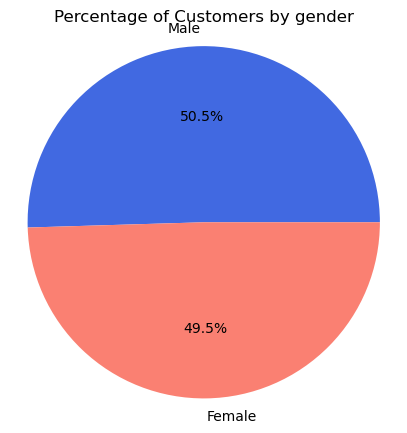

In [14]:
# Univariate Analysis for Gender
gender_count = df2['gender'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%',colors =["royalblue","salmon"])
plt.title("Percentage of Customers by gender")
plt.axis("equal")
plt.show()

we can see that there are no significant difference by customer gender. male is 50.5% while female is 49.5%

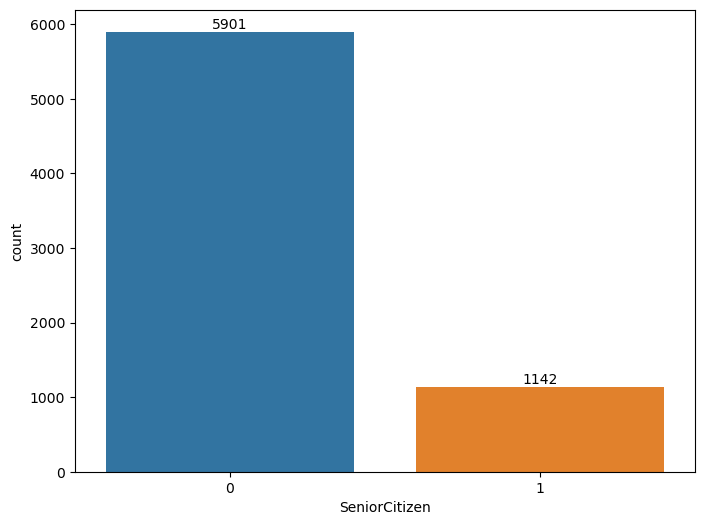

In [15]:
# Univariate Analysis for SeniorCitizen
plt.figure(figsize=(8,6))
seniorcitizen_count =df2['SeniorCitizen'].value_counts()
ax=sns.countplot(x='SeniorCitizen',data= df2,order =seniorcitizen_count.index )
ax.bar_label(container=ax.containers[0])
plt.show()

About 1142 customers are senior citizen

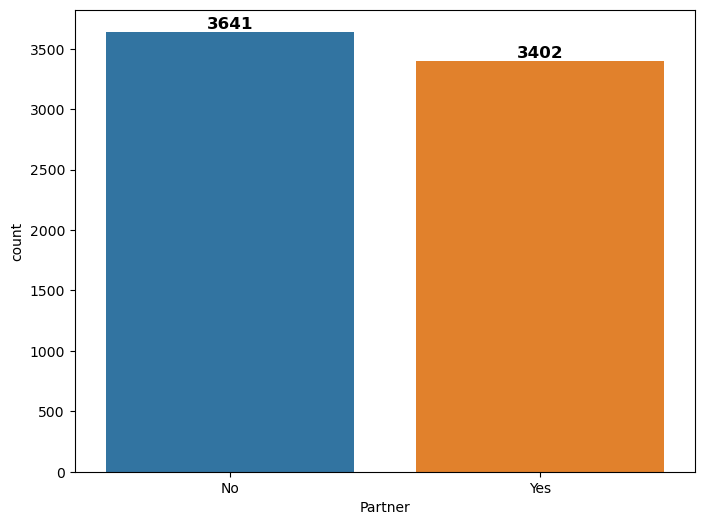

In [16]:
# Univariate Analysis for Customers that have Partner
plt.figure(figsize=(8,6))
partner_count = df2['Partner'].value_counts()
ax=sns.countplot(x='Partner',data= df2,order=partner_count.index)
ax.bar_label(container=ax.containers[0], weight = "bold",fontsize=12)
plt.show()

 3641 customers have no partner while about 3402 customers have partner

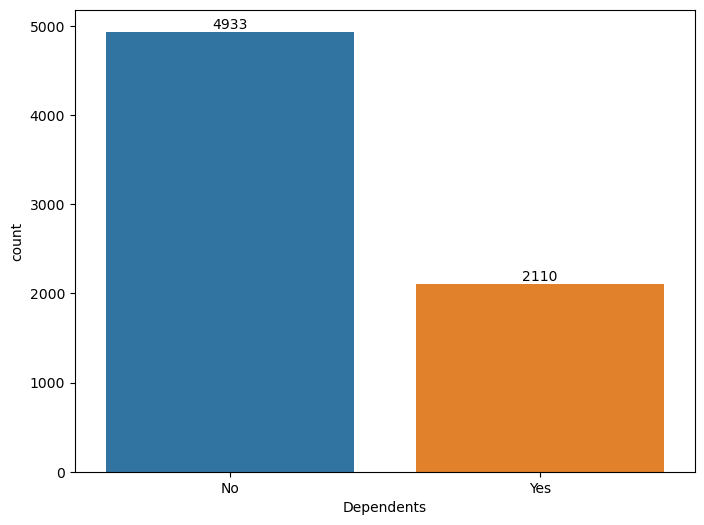

In [17]:
# Univariate Analysis for Customers that have Dependants
plt.figure(figsize=(8,6))
Dependents_count =df2['Dependents'].value_counts()
ax=sns.countplot(x='Dependents',data= df2,order =Dependents_count.index )
ax.bar_label(container=ax.containers[0])
plt.show()

About 2110 customer have dependent. from the analyses we can see that most customers do not have dependents

In [18]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Year',
       'Month', 'Quater', 'Month_name'],
      dtype='object')

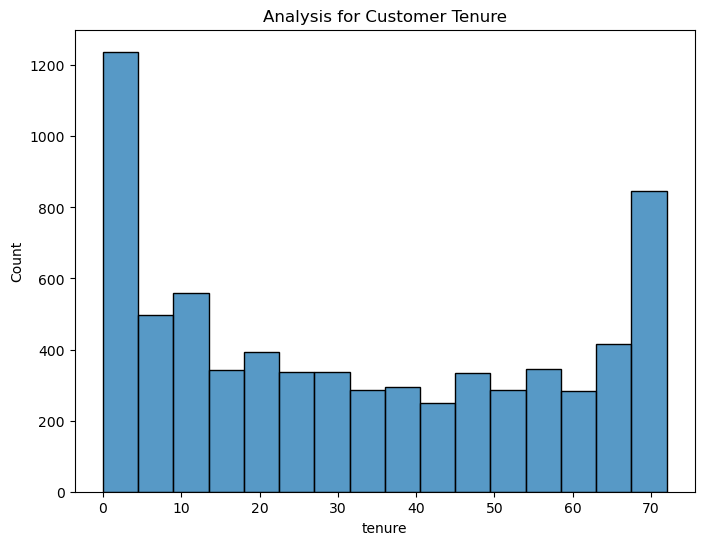

In [19]:
# Univariate Analysis for Customer Tenure
plt.figure(figsize=(8,6))
sns.histplot(x='tenure',data= df2)
plt.title("Analysis for Customer Tenure")
plt.show()

One interpretation of a U-shaped distribution in customer tenure is that there are two groups of customers: those who have a short tenure and those who exhibit long-term loyalty with a high tenure. This could suggest that the customer base consists of both transient customers who use the service briefly and loyal customers who stay with the company for a long time.

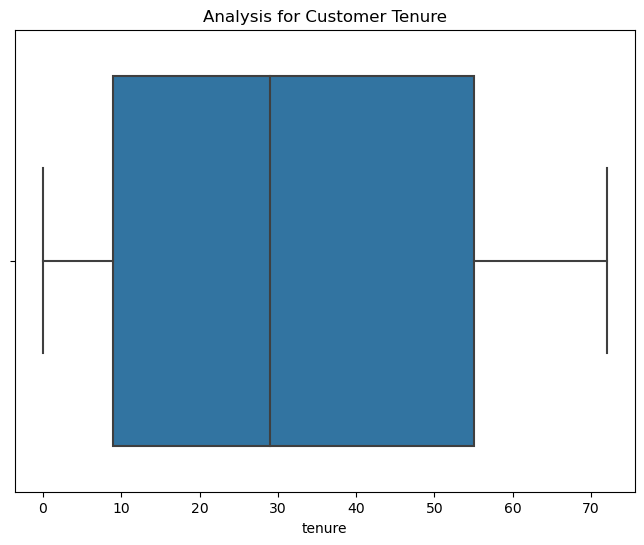

In [20]:
# Univariate Analysis for Customer Tenure
plt.figure(figsize=(8,6))
sns.boxplot(x='tenure',data= df2)
plt.title("Analysis for Customer Tenure")
plt.show()

From the analysis above we can see a U-shaped distribution in customer tenure, this  might imply:

Early churn and long-term loyalty: There are two groups of customers,those who churn early after a short tenure and those who exhibit long-term loyalty with a high tenure. This could suggest that the customer base consists of both transient customers who use the service briefly and loyal customers who stay with the company for a long time.

Segmentation opportunities: The presence of a U-shaped distribution may indicate opportunities for customer segmentation based on tenure. By identifying and understanding the characteristics of customers in each segment (e.g., new customers vs. long-term customers), businesses can tailor their marketing strategies, customer retention efforts, and product offerings to better meet the needs of each group.

Churn prediction: By studying the factors that contribute to early churn or long-term retention, businesses can develop predictive models to forecast which customers are likely to churn and take proactive measures to retain them.

Service adaptation: Understanding the distribution of customer tenure can help businesses adapt their services or offerings to better serve the needs of different customer segments. For example, businesses may offer special incentives or promotions to retain new customers during the early stages of their tenure, while focusing on enhancing the loyalty and satisfaction of long-term customers.

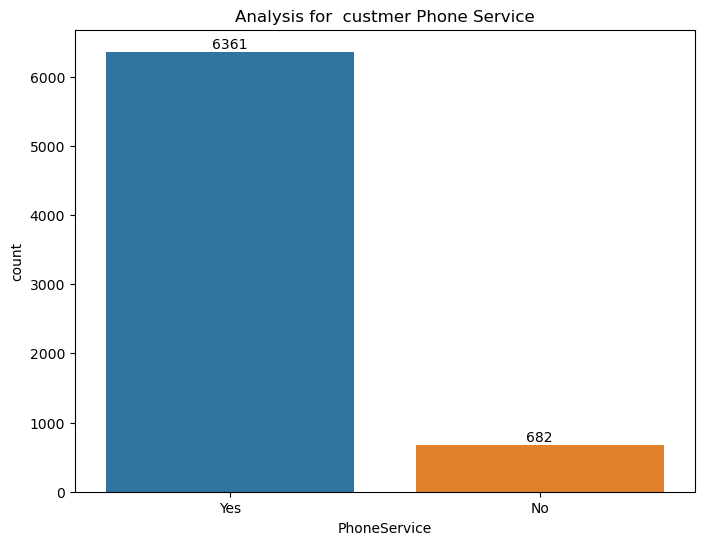

In [21]:
# Univariate Analysis for  custmer Phone Service
plt.figure(figsize=(8,6))
PhoneService_count =df2['PhoneService'].value_counts()
ax=sns.countplot(x='PhoneService',data= df2,order =PhoneService_count.index )
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for  custmer Phone Service")
plt.show()

About 6361 use Phone service while 682 customer do not

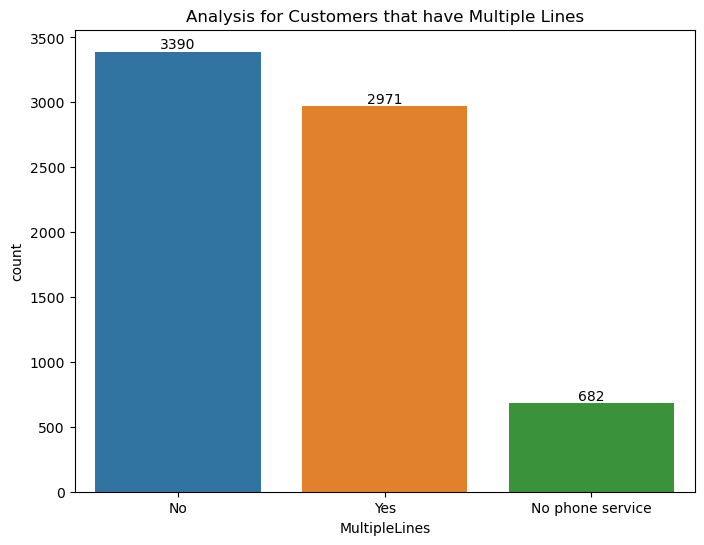

In [22]:
# Univariate Analysis for Customers that have Multiple Lines
plt.figure(figsize=(8,6))
MultipleLines_count =df2['MultipleLines'].value_counts()
ax=sns.countplot(x='MultipleLines',data= df2,order =MultipleLines_count.index )
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for Customers that have Multiple Lines")
plt.show()

### Based on the analysis from the plot above:

    There are 3390 customers who have a single line.
    There are 2971 customers who have multiple lines.
    

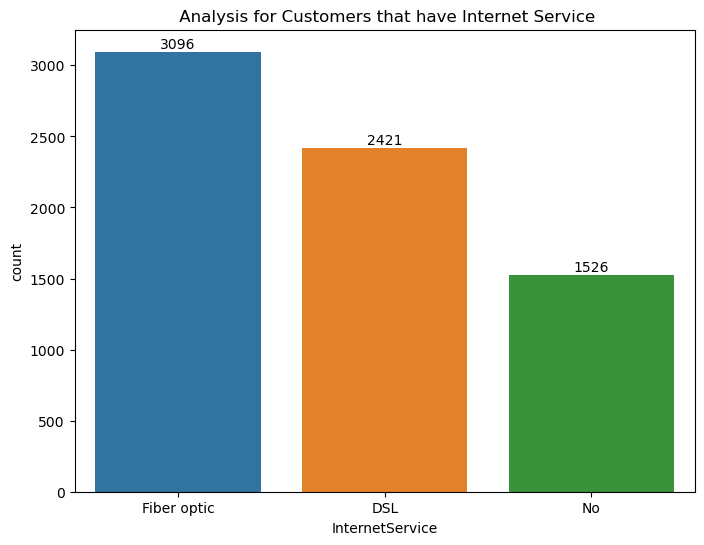

In [23]:
# Univariate Analysis for Customers that have Internet Service
plt.figure(figsize=(8,6))
InternetService_count =df2['InternetService'].value_counts()
ax=sns.countplot(x='InternetService',data= df2,order =InternetService_count.index )
ax.bar_label(container=ax.containers[0])
plt.title(" Analysis for Customers that have Internet Service")
plt.show()

Based on the analysis from the plot above:
There are 3096 customers who  use Fiber optic internet service.
There are 2421 customers who use DSL internet service.
There are 1526 customers who have no internet service.

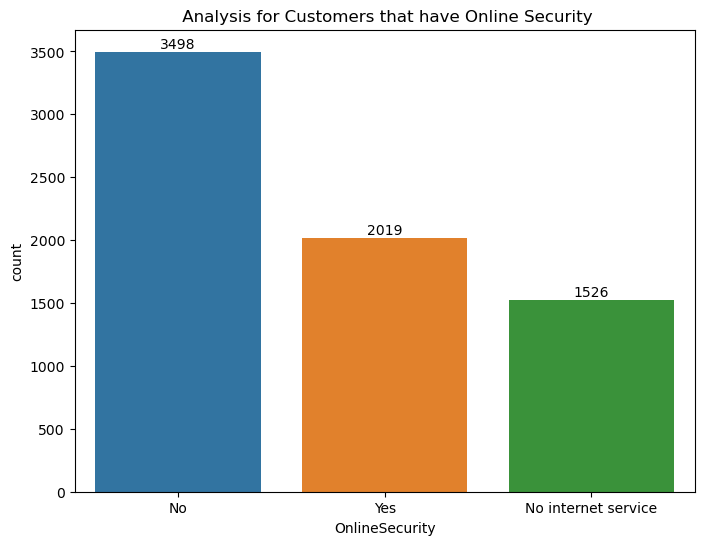

In [24]:
# Univariate Analysis for Customers that have Online Security
plt.figure(figsize=(8,6))
OnlineSecurity_count =df2['OnlineSecurity'].value_counts()
ax=sns.countplot(x='OnlineSecurity',data= df2,order =OnlineSecurity_count.index )
ax.bar_label(container=ax.containers[0])
plt.title(" Analysis for Customers that have Online Security")
plt.show()

### Based on the analysis from the plot above:
    There are 3498 customers who do not use online security.
    There are 2019 customers who use Online security.
    There are 1526 customers who have no internet service.

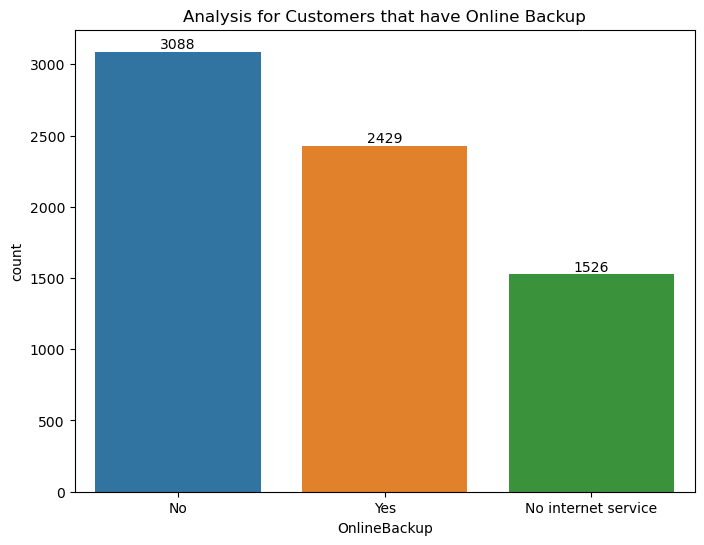

In [25]:
# Univariate Analysis for Customers that have Online Backup
plt.figure(figsize=(8,6))
OnlineBackup_count =df2['OnlineBackup'].value_counts()
ax=sns.countplot(x='OnlineBackup',data= df2,order =OnlineBackup_count.index )
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for Customers that have Online Backup")
plt.show()

### Based on the analysis from the plot above:
    There are 3088 customers who do not use online backup.
    There are 2429 customers who use Online backup.
    There are 1526 customers who have no internet service.

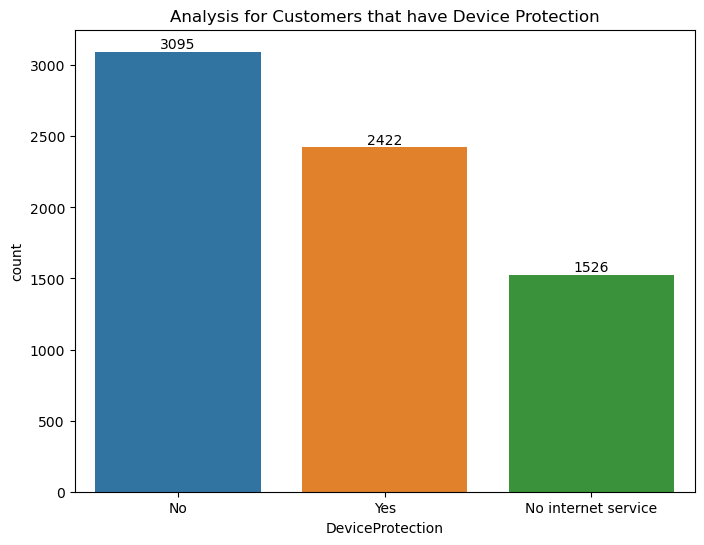

In [26]:
# Univariate Analysis for Customers that have Device Protection
plt.figure(figsize=(8,6))
DeviceProtection_count =df2['DeviceProtection'].value_counts()
ax=sns.countplot(x='DeviceProtection',data= df2,order =DeviceProtection_count.index )
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for Customers that have Device Protection")
plt.show()

### Based on the analysis from the plot above:
    There are 3095 customers who do not use device protection.
    There are 2422 customers who use device protection.
    There are 1526 customers who have no internet service.

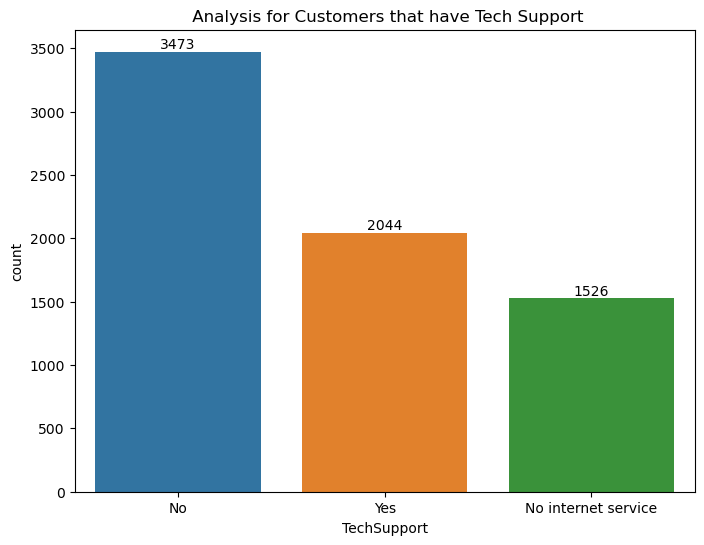

In [27]:
# Univariate Analysis for Customers that have Tech Support
plt.figure(figsize=(8,6))
TechSupport_count =df2['TechSupport'].value_counts()
ax=sns.countplot(x='TechSupport',data= df2,order =TechSupport_count.index )
ax.bar_label(container=ax.containers[0])
plt.title(" Analysis for Customers that have Tech Support")
plt.show()

### Based on the analysis from the plot above:
    There are 3473 customers who do not use tech support.
    There are 2044 customers who use tech support.
    There are 1526 customers who have no internet service.

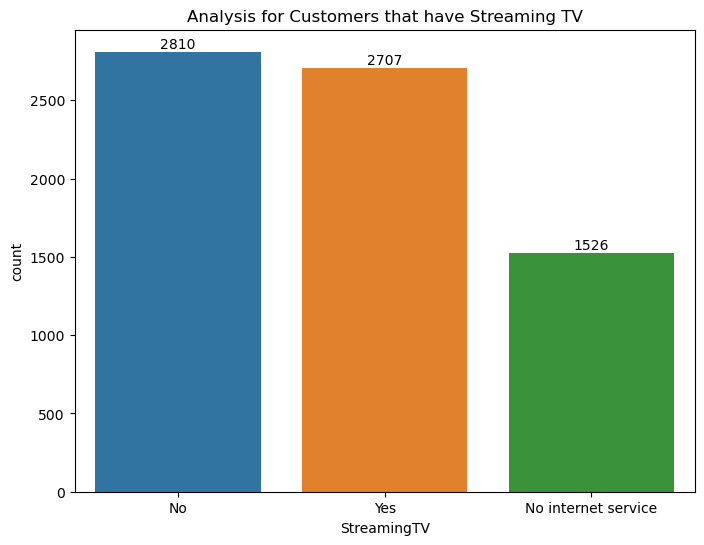

In [28]:
# Univariate Analysis for Customers that have Streaming TV
plt.figure(figsize=(8,6))
StreamingTV_count =df2['StreamingTV'].value_counts()
ax=sns.countplot(x='StreamingTV',data= df2,order =StreamingTV_count.index )
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for Customers that have Streaming TV")
plt.show()

### Based on the analysis from the plot above:
    There are 2810 customers who do not use Streming TV.
    There are 2707 customers who use Streaming TV.
    There are 1526 customers who have no internet service.

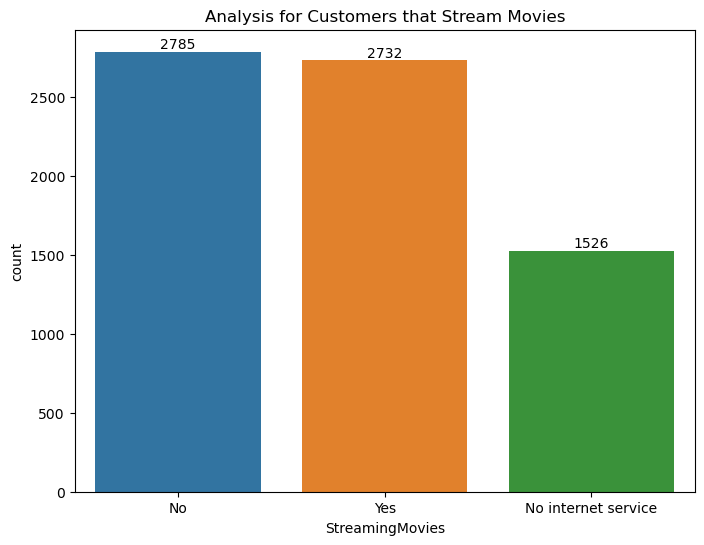

In [29]:
# Univariate Analysis for Customers that Stream Movies
plt.figure(figsize=(8,6))
StreamingMovies_count =df2['StreamingMovies'].value_counts()
ax=sns.countplot(x='StreamingMovies',data= df2,order =StreamingMovies_count.index )
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for Customers that Stream Movies")
plt.show()

### Based on the analysis from the plot above:
    There are 2785 customers who do not use Streaming Movies.
    There are 2732 customers who use Streaming Movies.
    There are 1526 customers who have no internet service.

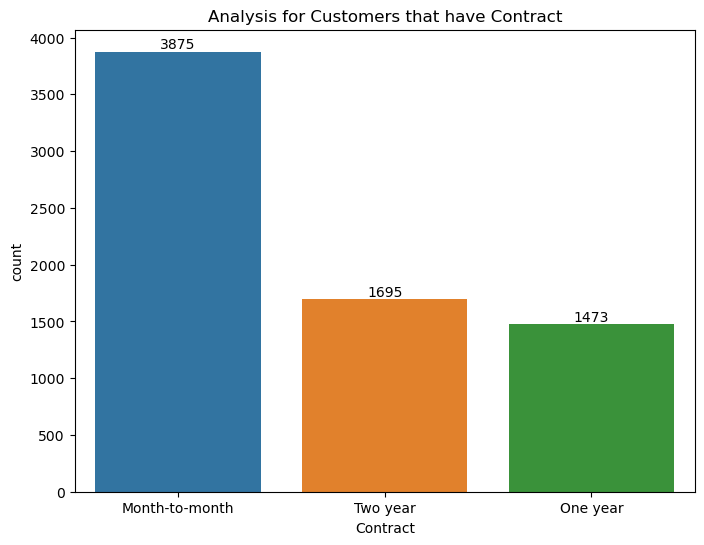

In [30]:
# Univariate Analysis for Customers that have Contract
plt.figure(figsize=(8,6))
Contract_count =df2['Contract'].value_counts()
ax=sns.countplot(x='Contract',data= df2,order =Contract_count.index )
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for Customers that have Contract")
plt.show()

### Based on the analysis from the plot above:
    There are 3875 customers who have month to month contract. Most customer do month to month contract
    There are 1695 customers who have a two year contract.
    There are 1473 customers who have one year contract.

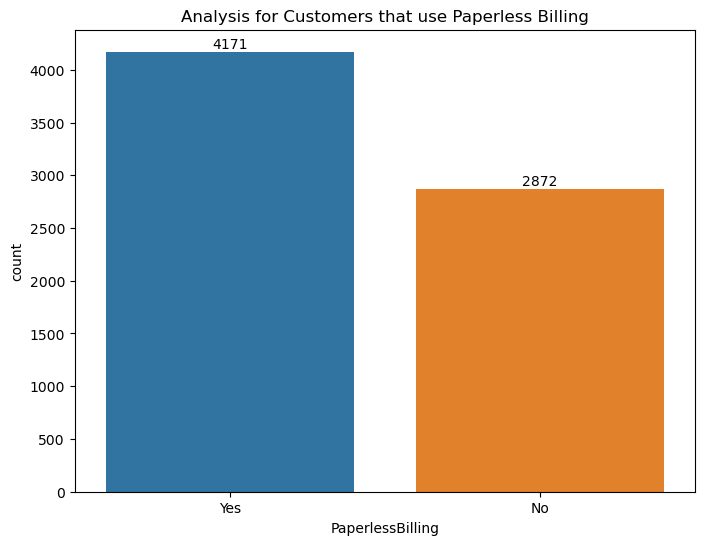

In [31]:
# Univariate Analysis for Customers that use Paperless Billing
plt.figure(figsize=(8,6))
PaperlessBilling_count =df2['PaperlessBilling'].value_counts()
ax=sns.countplot(x='PaperlessBilling',data= df2,order =PaperlessBilling_count.index )
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for Customers that use Paperless Billing")
plt.show()

### Based on the analysis from the plot above:
    There are 4171 customers who use paperless billing.
    There are 2872 customers who do not use paperless billing.
    

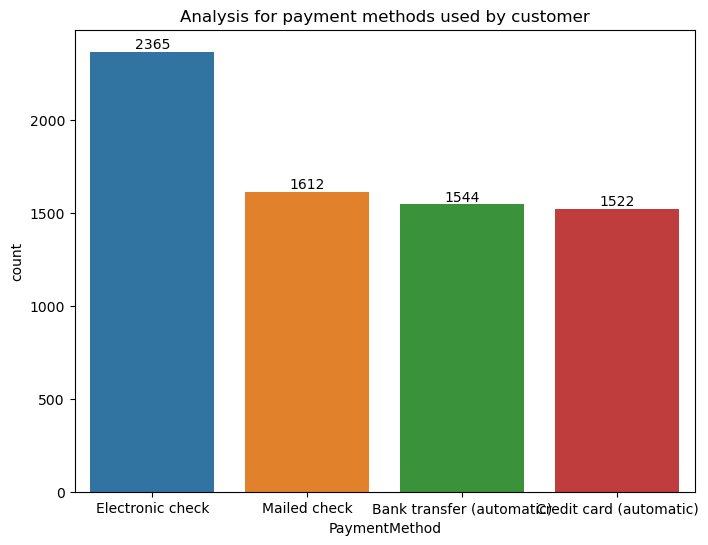

In [32]:
# Univariate Analysis for payment methods used by customer
plt.figure(figsize=(8,6))
PaymentMethod_count =df2['PaymentMethod'].value_counts()
ax=sns.countplot(x='PaymentMethod',data= df2,order =PaymentMethod_count.index )
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for payment methods used by customer")
plt.show()

### Based on the analysis from the plot above:
    There are 2365 customers who use elctronic check.
    There are 1612 customers who use mailed check.
    There are 1544 customers who use bank transfer.  
    There are 1522 customers who use credit card.
        

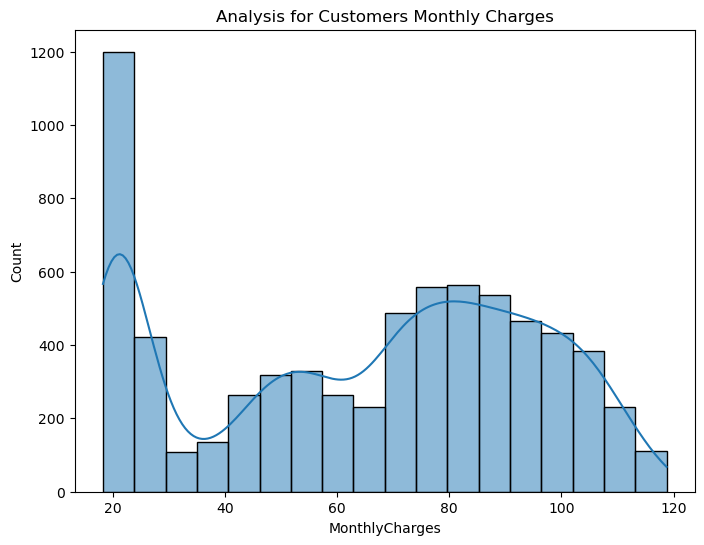

In [33]:
# Univariate Analysis for Customers Monthly Charges
plt.figure(figsize=(8,6))
sns.histplot(x='MonthlyCharges',data= df2,kde=True)
plt.title("Analysis for Customers Monthly Charges")
plt.show()

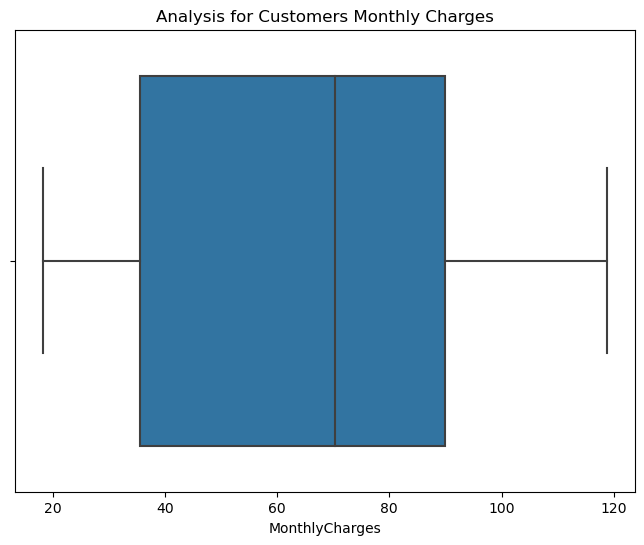

In [34]:
# Univariate Analysis for Customers Monthly Charges
plt.figure(figsize=(8,6))
sns.boxplot(x='MonthlyCharges',data= df2)
plt.title("Analysis for Customers Monthly Charges")
plt.show()

### Based on the analysis from the plot above:
    MonthlyCharges: The distribution of Monthly Charges is right-skewed, indicating that there are relatively more customers with low monthly charges compared to the few of customers who have higher charges.  

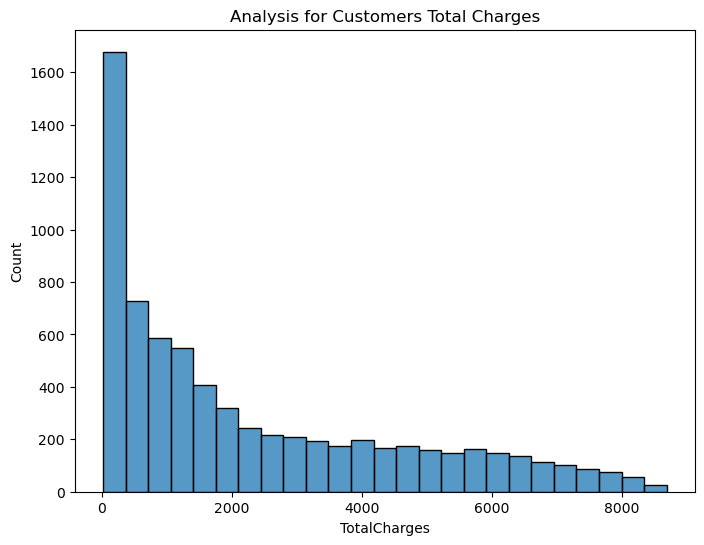

In [35]:
# Univariate Analysis for Customer Total Charges
plt.figure(figsize=(8,6))
sns.histplot(x='TotalCharges',data= df2)
plt.title("Analysis for Customers Total Charges")
plt.show()

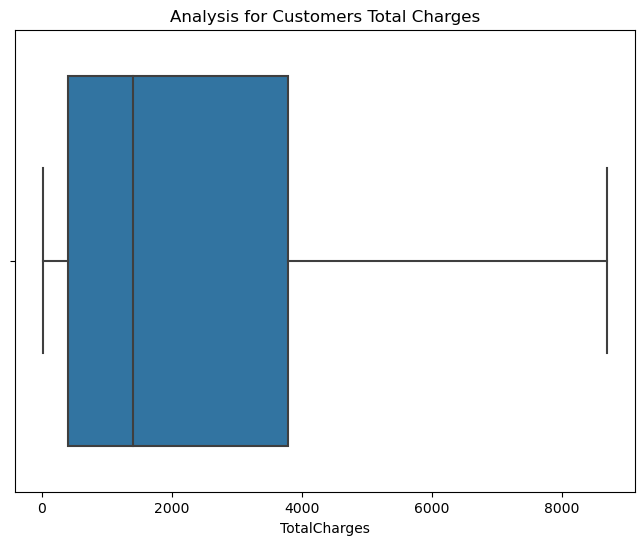

In [36]:
# Univariate Analysis for Customer Total Charges
plt.figure(figsize=(8,6))
sns.boxplot(x='TotalCharges',data= df2)
plt.title("Analysis for Customers Total Charges")
plt.show()

### Based on the analysis from the plot above:
  Total Charges: The distribution of Total Charges is right-skwed, indicating that there are relatively more customers with low monthly charges compared to the few of customers who have higher charges.

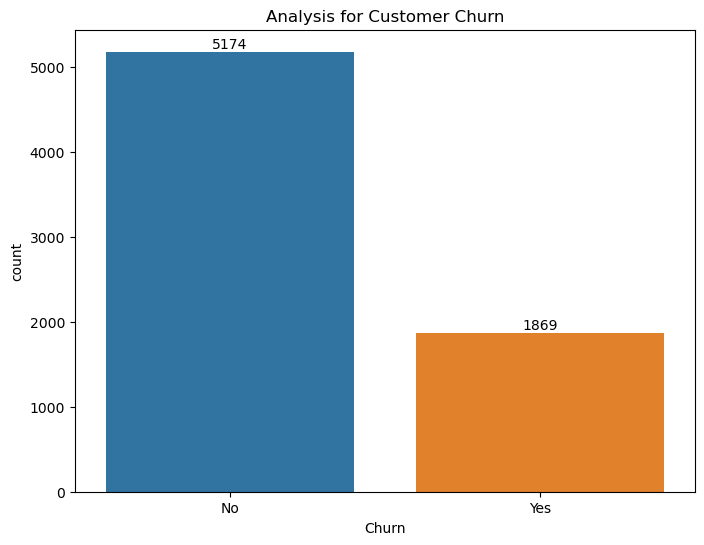

In [37]:
# Univariate Analysis for Customer Churn
plt.figure(figsize=(8,6))
Churn_count =df2['Churn'].value_counts()
ax=sns.countplot(x='Churn',data= df2,order =Churn_count.index )
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for Customer Churn")
plt.show()

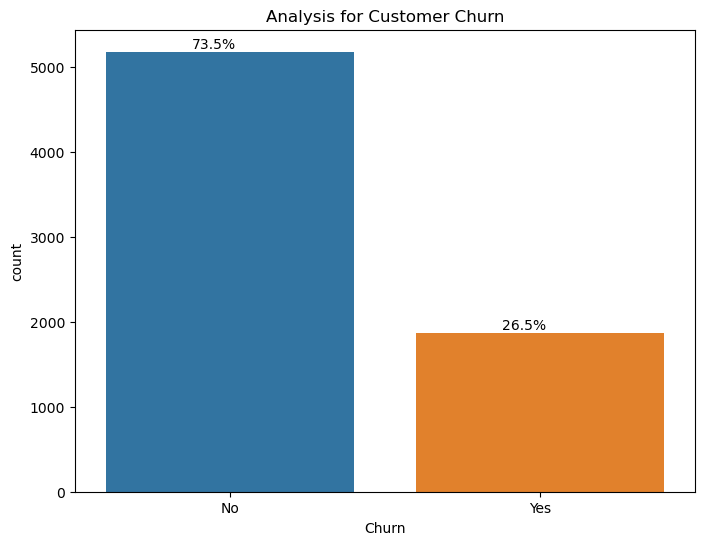

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
Churn_count = df2['Churn'].value_counts()
ax = sns.countplot(x='Churn', data=df2, order=Churn_count.index)

# Calculate percentage values
total = len(df2['Churn'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Analysis for Customer Churn")
plt.show()

### Based on the analysis from the plot above:
we can see that 1869 customers churned, this 26.53% of the customer base.

### df2.describe(include=(bool,object)).T

In [38]:
#from sklearn.preprocessing import LabelEncoder
#intantitate label encoder
#encoder = LabelEncoder()

#looping for columns except survived
#for c in df2.columns[1: ]:
    #if (df2[c].dtype == "object"):
       # data[c]=encoder.fit_transform(df2[c])
    #else:
       # df2[c]=df2[c]
#df2.head()

In [39]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Year',
       'Month', 'Quater', 'Month_name'],
      dtype='object')

In [40]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Year,Month,Quater,Month_name
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,1,January
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,2,10,4,October
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,2,1,February
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,3,9,3,September
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,2,1,February


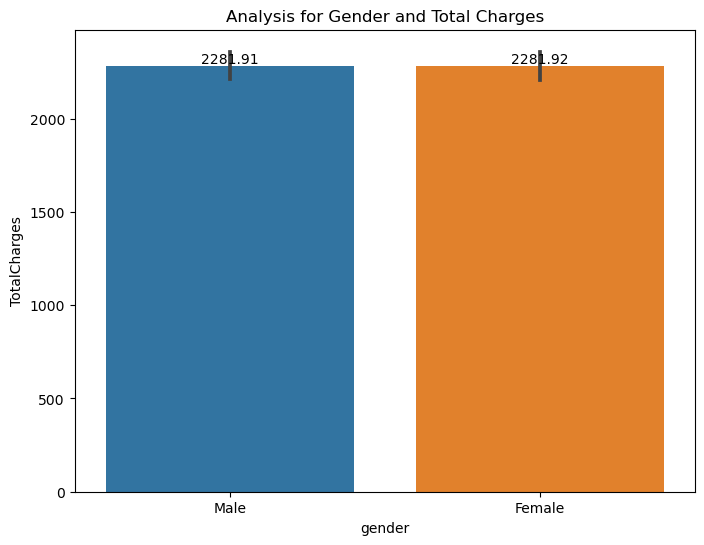

In [41]:
# Bivarite Analysis for gender and total charges
plt.figure(figsize=(8,6))
gendercount = df2["gender"].value_counts()
ax=sns.barplot(x="gender",data=df2,y='TotalCharges',order=gendercount.index)
ax.bar_label(container=ax.containers[0])
plt.title("Analysis for Gender and Total Charges")
plt.show()


There is no significant difference between male and female customer Total charges

In [42]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Year',
       'Month', 'Quater', 'Month_name'],
      dtype='object')

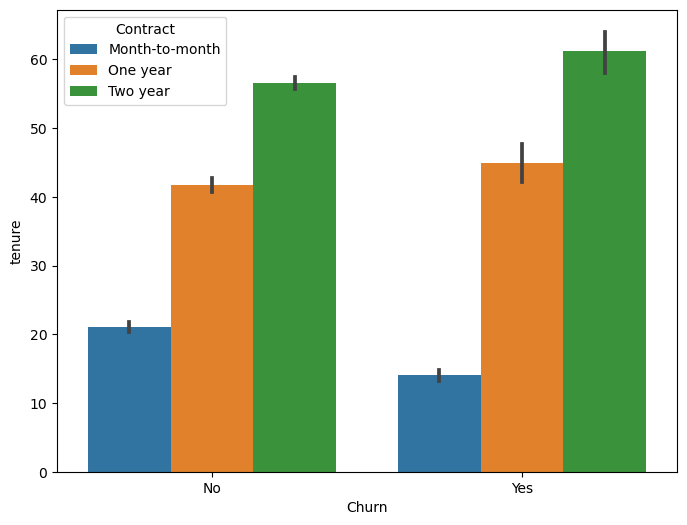

In [43]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "tenure",hue = "Contract")
plt.show()


It appears that customers who churn tend to prefer credit card and bank transfer payment options more frequently compared to check payment options. This insight can be valuable for understanding the behavior of customers who are more likely to churn and may inform strategies for retaining them.

To capitalize on this observation, the company could consider:

Tailored Payment Options: Offering incentives or discounts for customers who opt for credit card or bank transfer payments, thereby encouraging retention.

Improved Check Payment Experience: Assessing and addressing any pain points or dissatisfaction associated with check payment options to make them more attractive to customers.

Targeted Marketing: Leveraging this information in marketing campaigns to promote preferred payment options and highlight their benefits, potentially influencing customer behavior.

By incorporating these insights into strategic decision-making processes, the company can work towards reducing customer churn and improving overall customer satisfaction and loyalty.

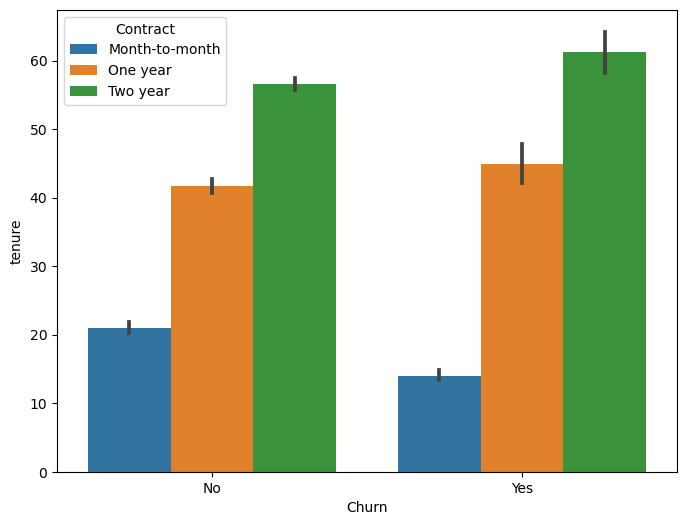

In [44]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "tenure",hue = "Contract")
plt.show()

Customers with 2-year and 1-year contracts, are more likely to churn compared to those with month-to-month contracts.

Based on this observation, the company can consider the following strategies:

Contract Flexibility: Offer more flexible contract options or incentives for customers to switch to month-to-month contracts. This could include promotional pricing or additional benefits for choosing shorter contract durations.

Retention Incentives: Implement retention strategies targeted towards customers with longer contracts, such as personalized offers, loyalty rewards, or contract renewal discounts, to reduce churn rates among this segment.

Enhanced Customer Experience: Focus on improving the overall customer experience for customers with longer contracts to increase satisfaction and loyalty, potentially reducing churn rates.

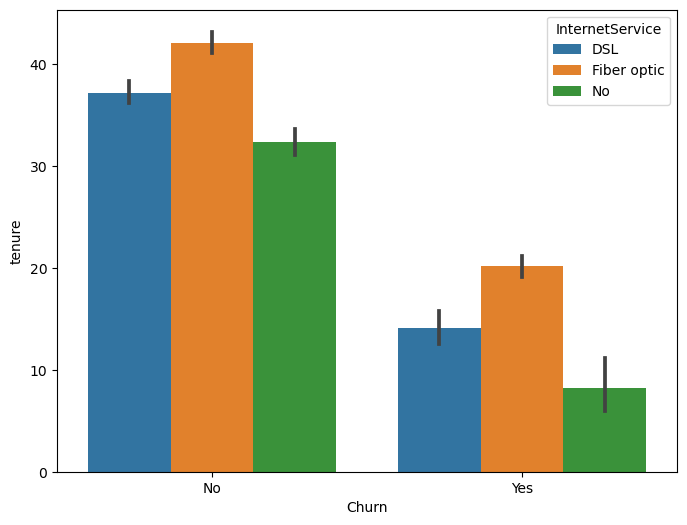

In [45]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "tenure",hue = "InternetService")
plt.show()


It's significant to note that customers with fiber optic internet service have the highest churn rate, followed by customers with DSL internet service. Conversely, customers without internet service exhibit the lowest churn rate.

This insight suggests that there may be specific issues or challenges associated with fiber optic and DSL internet services that contribute to higher churn rates among these customer segments. Conversely, customers without internet service may be less susceptible to churn due to their different needs or usage patterns.

To address this observation, the company can consider the following actions:

Service Improvement: Evaluate and address any issues or pain points associated with fiber optic and DSL internet services, such as reliability, speed, or customer support, to enhance customer satisfaction and reduce churn rates.

Retention Offers: Offer targeted retention offers or incentives to customers with fiber optic and DSL internet services to encourage them to stay with the company. This could include discounted rates, service upgrades, or loyalty rewards.

Customer Education: Provide proactive communication and education to customers about the benefits and features of their internet services, helping them make informed decisions and potentially reducing churn.

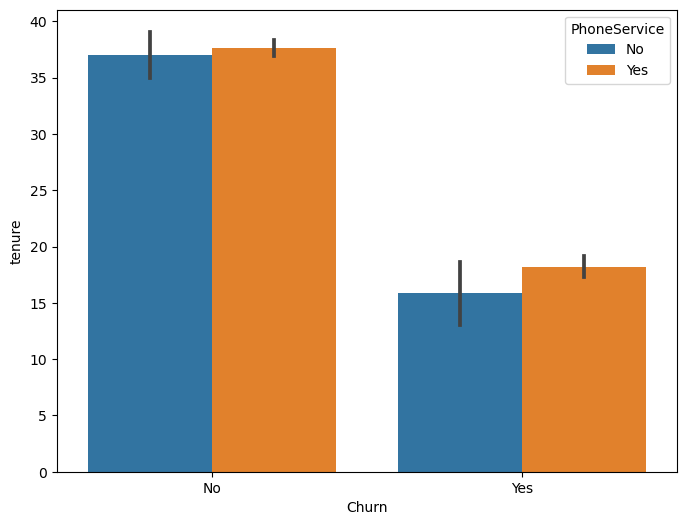

In [46]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "tenure",hue = "PhoneService")
plt.show()

 It appears that customers who have phone services exhibit a higher churn rate compared to those without phone service. This insight suggests that there may be underlying issues or dissatisfaction related to the phone service itself or associated factors such as customer support or billing.

To address this observation and reduce churn among customers with phone services, the company could consider the following strategies:

Service Improvement: Evaluate the quality and reliability of the phone service, including call connectivity, call clarity, and customer support responsiveness. Address any identified issues to enhance the overall customer experience.

Customer Support Enhancement: Focus on improving customer support services for phone-related inquiries or issues. This could involve training support staff to effectively address customer concerns and provide timely assistance.

Communication and Transparency: Proactively communicate with customers about any changes or updates to the phone service, billing processes, or service offerings. Transparency and clear communication can help manage customer expectations and mitigate dissatisfaction.

Retention Offers: Offer targeted retention offers or discounts to customers experiencing phone service-related issues. Providing incentives for them to stay with the company despite challenges can help reduce churn.

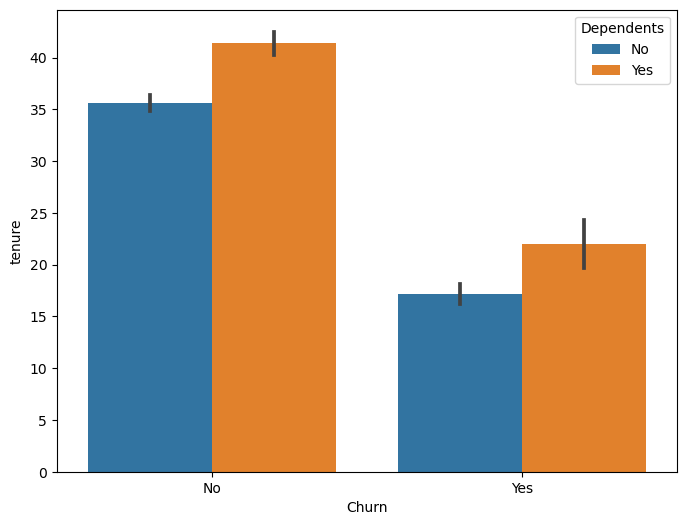

In [47]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "tenure",hue = "Dependents")
plt.show()

Customers with dependents exhibit the highest churn rate, while those without dependents demonstrate the lowest churn rate. This suggests a potential correlation between having dependents and churn propensity, warranting further investigation into the underlying factors influencing customer retention in each segment.

Recommendation
To address the higher churn rate among customers with dependents, the company should consider implementing targeted retention strategies tailored to the needs and preferences of this customer segment. Additionally, conducting in-depth customer satisfaction surveys or interviews can help uncover specific pain points or challenges experienced by customers with dependents, enabling the company to proactively address these issues and improve overall retention efforts.

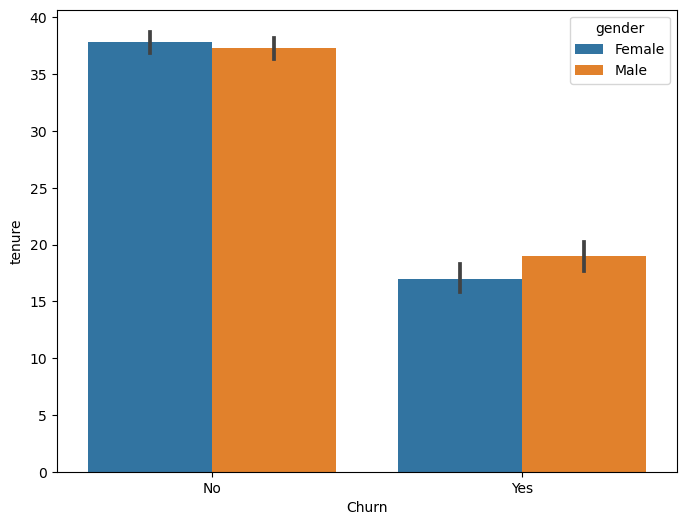

In [48]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "tenure",hue = "gender")
plt.show()

more of the male customers churn than the female

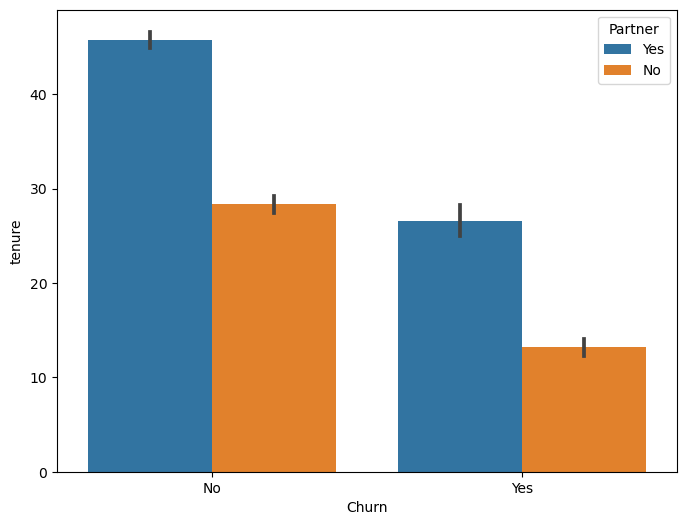

In [49]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "tenure",hue = "Partner")
plt.show()


Attrition is high with customers that have partner

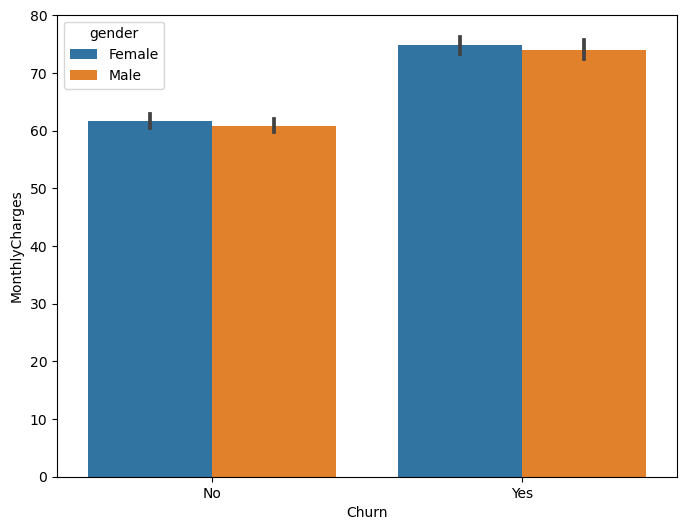

In [50]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "MonthlyCharges",hue = "gender")
plt.show()

There is no significant difference between male and female customer Attrition

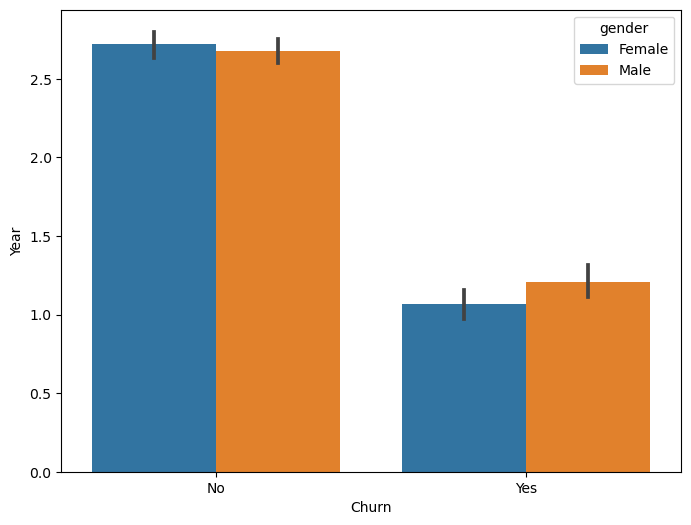

In [51]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "Year",hue = "gender")
plt.show()

The analysis reveals a higher attrition rate among male customers on an annual basis. This observation underscores the importance of targeted retention efforts tailored to the unique needs and preferences of male customers to mitigate churn and enhance overall customer satisfaction and loyalty.

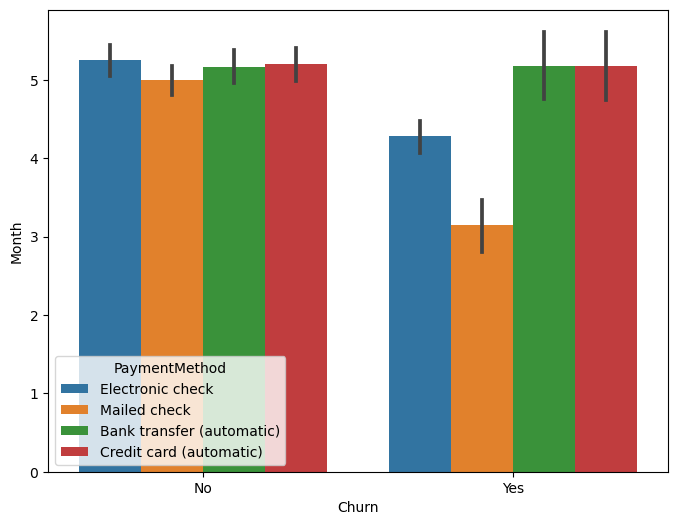

In [52]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "Month",hue = "PaymentMethod")
plt.show()

Customers utilizing credit card and bank transfer payments tend to churn after approximately 5 months, while those employing electronic check payments exhibit churn around 4 months. Interestingly, customers utilizing mailed check payments have the lowest churn rate, albeit after approximately 3 months. This suggests a potential correlation between payment method and churn timing, warranting further investigation to optimize retention strategies.

RECOMMENDATION
To mitigate early churn, the company should focus on enhancing the customer experience within the first few months of service, particularly for those using electronic check payments. Additionally, implementing proactive measures such as targeted incentives or personalized outreach may help extend customer retention periods for all payment methods.


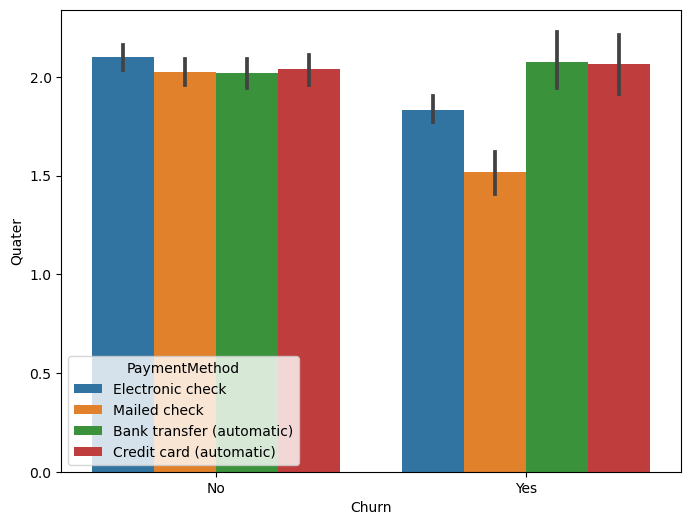

In [53]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Churn",data=df2,y= "Quater",hue = "PaymentMethod")
plt.show()

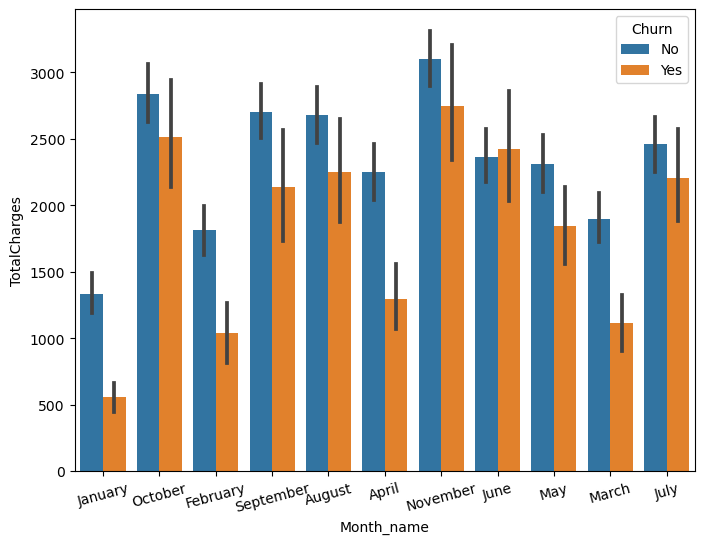

In [54]:
# Multivariate Analysis
plt.figure(figsize=(8,6))
sns.barplot(x="Month_name",data=df2,y= "TotalCharges",hue = "Churn")
plt.xticks(rotation=15)
plt.show()

The customer churn rate was lowest in January, indicating potential seasonal trends or promotional influences. However, it is noteworthy that despite the increase in total charges observed in November, customer attrition was unexpectedly highest during the same period, suggesting a need for further investigation into the underlying factors driving churn behavior during peak revenue periods.

Recommendation

implementing targeted retention strategies, such as personalized offers or improved customer support, during high-revenue months can help mitigate churn and sustain long-term customer relationships




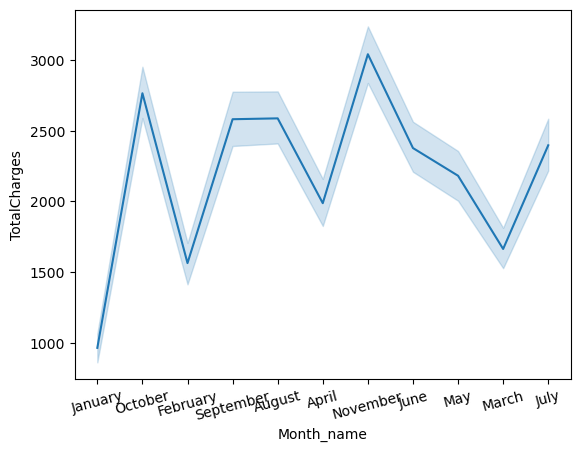

In [55]:
sns.lineplot(x="Month_name",data= df2, y="TotalCharges")
plt.xticks(rotation=15)
plt.show()

The lowest total charges were observed in February, followed by a significant increase starting from April, reaching the highest total charges by November. This trend suggests potential seasonal or promotional influences on total charges

In [56]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Year',
       'Month', 'Quater', 'Month_name'],
      dtype='object')

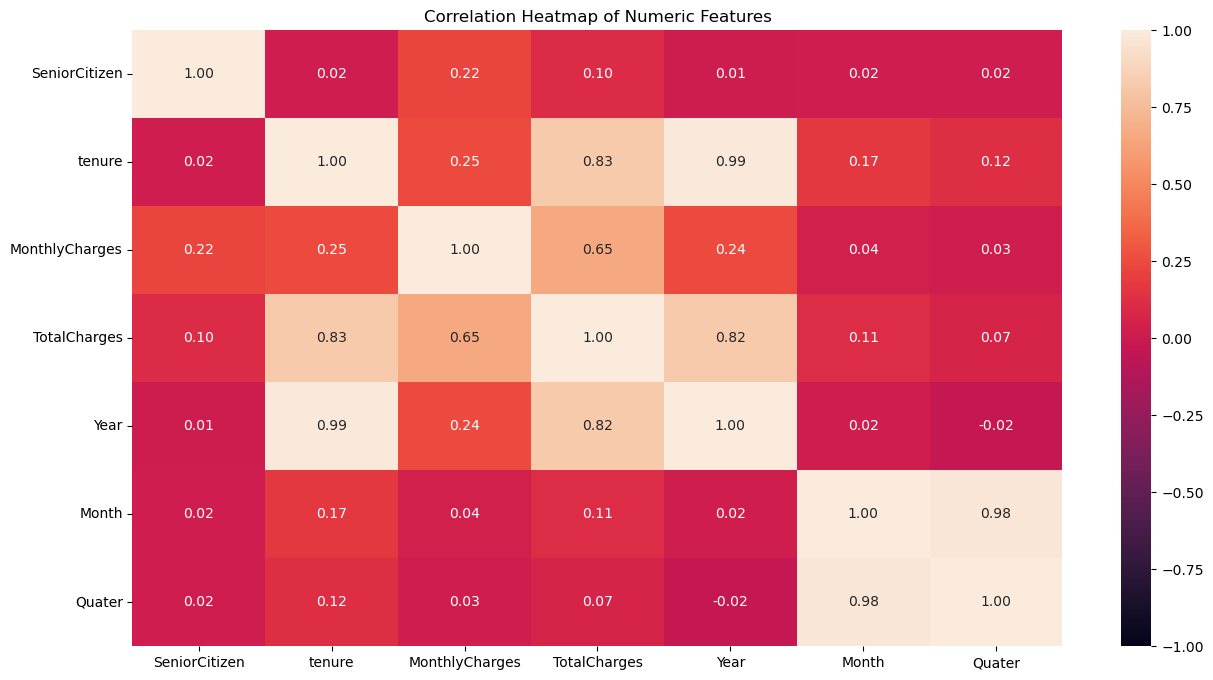

In [57]:
numeric_df2=df2.select_dtypes(include=(float,int))
a = numeric_df2.corr()
f,ax =plt.subplots(figsize=(15,8))
sns.heatmap(a,vmax=1,vmin=-1,annot=True,fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Tenure demonstrates a strong positive correlation with total charges (0.83), indicating that as tenure increases, total charges also tend to increase significantly.

Total charges exhibit a strong correlation with year (0.82), suggesting that total charges may vary significantly across different years.

Total charges also display a strong correlation with monthly charges (0.65), indicating that customers with higher monthly charges tend to have higher total charges as well.

Senior citizens show a weaker correlation of 0.22 with monthly charges, suggesting a less pronounced relationship compared to the other correlations mentioned.

In [58]:
df2["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [59]:
df2['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [60]:
df2['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [61]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Year',
       'Month', 'Quater', 'Month_name'],
      dtype='object')

## feature Engineering

In [62]:

# Assuming 'tenure' is a numeric column in your DataFrame

bins = [0, 12, 24, 36, float('inf')]
labels = ['0-1 year', '1-2 years', '2-3 years', '3+ years']

df2['Age_group'] = pd.cut(df2['tenure'], bins=bins, labels=labels)

# creating spending behavour column
df2['Spending_behavior'] = pd.cut(df2['MonthlyCharges'], bins=[0, 50, 75, 100, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

 # Create interaction features from tenure and monthly charges

df2['tenure_MonthlyCharges_interaction'] = df2['tenure'] * df2['MonthlyCharges']



# Create interaction features from Total charges and tenure

# Add a small epsilon value to tenure to avoid division by zero

epsilon = 1e-9  # or any small value that suits your data

# Handle division by zero for tenure

df2['TotalCharges_per_tenure'] = df2['TotalCharges'] / (df2['tenure'].replace(0, epsilon))



# Create interaction features from 2 year contract and monthly charges

df2['Contract_Two_year_MonthlyCharges_interaction'] = (df2['Contract'] == 'Two year') * df2['MonthlyCharges']




Let's go through the impact of each feature:

Age_group: This feature categorizes customers based on their tenure into different age groups. By dividing customers into groups based on how long they have been with the company, it provides insight into their level of loyalty or engagement. For example, customers in the '3+ years' group might be more loyal and less likely to churn compared to those in the '0-1 year' group, who are relatively new.

Spending_behavior: This feature categorizes customers based on their monthly charges into different spending behavior groups. It provides insight into the spending habits of customers, which can indicate their level of engagement with the company's services. For example, customers in the 'Very High' spending behavior group might be more invested in the services and less likely to churn compared to those in the 'Low' spending behavior group.

tenure_MonthlyCharges_interaction: This feature captures the interaction between tenure and monthly charges. It represents how much a customer has spent over their tenure with the company. Higher values in this feature might indicate customers who have been with the company for a longer time and are paying higher monthly charges, which could suggest loyalty or higher usage of services, potentially leading to lower churn rates.

TotalCharges_per_tenure: This feature calculates the average monthly spending by dividing the total charges by tenure. It provides insight into the average spending behavior of customers over time. Higher values might suggest customers who consistently spend more per month, indicating higher-value customers less likely to churn.

Contract_Two_year_MonthlyCharges_interaction: This feature represents the interaction between having a two-year contract and monthly charges. It captures whether customers with two-year contracts tend to have higher or lower monthly charges compared to others. Higher values in this feature might indicate customers who are locked into longer contracts with potentially lower monthly charges, indicating a higher commitment level and lower likelihood of churn.

In [63]:
# Compute aggregate statistics
contract_stats = df.groupby('Contract').agg({'MonthlyCharges': ['mean', 'min', 'max', 'std'],
                                             'TotalCharges': ['mean', 'min', 'max', 'std']})

internet_service_stats = df.groupby('InternetService').agg({'MonthlyCharges': 'mean'})

print("Aggregate Statistics for each Contract type:")
print(contract_stats)

print("\nAverage MonthlyCharges for each InternetService type:")
print(internet_service_stats)

Aggregate Statistics for each Contract type:
               MonthlyCharges                           TotalCharges         \
                         mean    min     max        std         mean    min   
Contract                                                                      
Month-to-month      66.398490  18.75  117.45  26.926599  1369.254581  18.85   
One year            65.048608  18.25  118.60  31.840539  3034.683084  18.80   
Two year            60.770413  18.40  118.75  34.678865  3728.933947  20.35   

                                      
                    max          std  
Contract                              
Month-to-month  8061.50  1613.879008  
One year        8684.80  2229.730075  
Two year        8672.45  2571.252806  

Average MonthlyCharges for each InternetService type:
                 MonthlyCharges
InternetService                
DSL                   58.102169
Fiber optic           91.500129
No                    21.079194


In [64]:
# Drop columns 'Month_name' and 'customerID'
df2 = df2.drop(["Month_name", 'customerID'], axis=1)

#Display the first few rows of the modified DataFrame
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,Year,Month,Quater,Age_group,Spending_behavior,tenure_MonthlyCharges_interaction,TotalCharges_per_tenure,Contract_Two_year_MonthlyCharges_interaction
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,No,0,1,1,0-1 year,Low,29.85,29.850000,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,1889.50,No,2,10,4,2-3 years,Medium,1936.30,55.573529,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,108.15,Yes,0,2,1,0-1 year,Medium,107.70,54.075000,0.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,1840.75,No,3,9,3,3+ years,Low,1903.50,40.905556,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,151.65,Yes,0,2,1,0-1 year,Medium,141.40,75.825000,0.0


In [65]:
# Encoding the categorical features in the dataset using one hot encoding
# Using scikit-learn
from sklearn.preprocessing import OneHotEncoder
df2_encoded=pd.get_dummies(df2,drop_first=True)

In [66]:
df2_encoded.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
MonthlyCharges,29.85,56.95,53.85,42.3,70.7,99.65,89.1,29.75,104.8,56.15,...,69.5,102.95,78.7,60.65,21.15,84.8,103.2,29.6,74.4,105.65
TotalCharges,29.85,1889.5,108.15,1840.75,151.65,820.5,1949.4,301.9,3046.05,3487.95,...,2625.25,6886.25,1495.1,743.3,1419.4,1990.5,7362.9,346.45,306.6,6844.5
Year,0,2,0,3,0,0,1,0,2,5,...,3,5,1,1,6,2,6,0,0,5
Month,1,10,2,9,2,8,10,10,4,2,...,2,7,7,0,0,0,0,11,4,6
Quater,1,4,1,3,1,3,4,4,2,1,...,1,3,3,0,0,0,0,4,2,2
tenure_MonthlyCharges_interaction,29.85,1936.3,107.7,1903.5,141.4,797.2,1960.2,297.5,2934.4,3481.3,...,2641.0,6897.65,1495.3,727.8,1522.8,2035.2,7430.4,325.6,297.6,6972.9
TotalCharges_per_tenure,29.85,55.573529,54.075,40.905556,75.825,102.5625,88.609091,30.19,108.7875,56.257258,...,69.085526,102.779851,78.689474,61.941667,19.713889,82.9375,102.2625,31.495455,76.65,103.704545
Contract_Two_year_MonthlyCharges_interaction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.15,0.0,0.0,0.0,0.0,105.65


In [67]:
df2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Year,Month,Quater,tenure_MonthlyCharges_interaction,TotalCharges_per_tenure,Contract_Two_year_MonthlyCharges_interaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,2.285958,4.939656,1.992333,2279.581350,2.182625e+09,14.625280
std,0.368612,24.559481,30.090047,2265.270398,2.017253,3.609868,1.256711,2264.729447,5.518906e+10,31.052866
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,1.377500e+01,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,1.000000,1.000000,394.000000,3.625500e+01,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,2.000000,5.000000,2.000000,1393.600000,7.045000e+01,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,4.000000,8.000000,3.000000,3786.100000,9.028583e+01,0.000000
max,1.000000,72.000000,118.750000,8684.800000,6.000000,11.000000,4.000000,8550.000000,1.397475e+12,118.750000


In [68]:
print(df2_encoded.isnull().sum())

SeniorCitizen                                   0
tenure                                          0
MonthlyCharges                                  0
TotalCharges                                    0
Year                                            0
Month                                           0
Quater                                          0
tenure_MonthlyCharges_interaction               0
TotalCharges_per_tenure                         0
Contract_Two_year_MonthlyCharges_interaction    0
gender_Male                                     0
Partner_Yes                                     0
Dependents_Yes                                  0
PhoneService_Yes                                0
MultipleLines_No phone service                  0
MultipleLines_Yes                               0
InternetService_Fiber optic                     0
InternetService_No                              0
OnlineSecurity_No internet service              0
OnlineSecurity_Yes                              0


In [69]:
#segmentation- seperating our target label from other features
target = df2_encoded.pop("Churn_Yes")

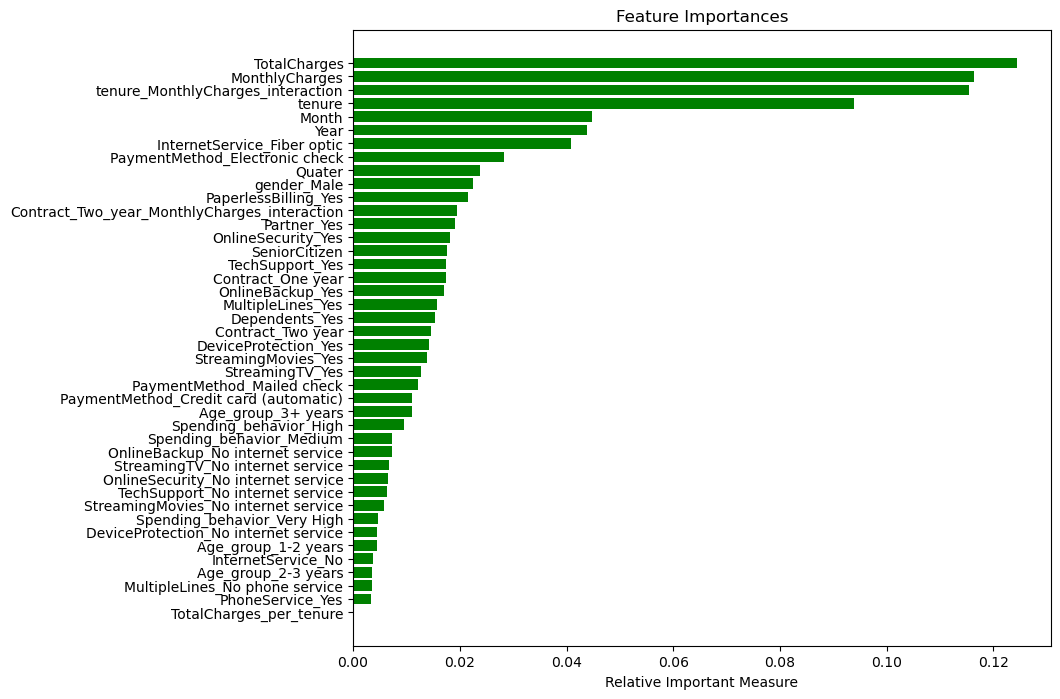

In [70]:
# To scale the data

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Handle division by zero for tenure

df2['tenure'] = df2['tenure'].replace(0, 1)

df2['TotalCharges_per_tenure'] = df2['TotalCharges'] / df2['tenure']

# Initialize the scaler
scaler = MinMaxScaler()

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the encoded DataFrame
df2_scaled = pd.DataFrame(scaler.fit_transform(df2_encoded), columns=df2_encoded.columns)


# identifying key features in the dataset

model = RandomForestClassifier()
    
    
# fit model

model.fit(df2_scaled,target)

# using random classifier to identify the important features in the dataset for our target Churn_Yes

impt_features = model.feature_importances_

# to sort the features by order of importance we use Numpy

sort_impt = np.argsort(impt_features)

# To see the column names

names = list(df2_encoded.columns)

# To plot the visualization

plt.figure(figsize=(9,8))
plt.barh(range(len(sort_impt)),impt_features[sort_impt],color="green")
plt.yticks(range(len(sort_impt)),[names[x] for x in sort_impt])
plt.title("Feature Importances")
plt.xlabel("Relative Important Measure")
plt.show()




In [ ]:
These features provide valuable insights into the factors influencing customer churn in your dataset.
Total charges
Monthly charges
Tenure_MonthlyCharges_interaction
Tenure
Month
Year
Internet service - fiber optic
Payment method - electronic check
Quarter
Gender - male
Contract 2 years
Online security
Paperless billing

In [71]:
# Define numeric_columns as the list of column names with numeric data types
numeric_columns = df2_encoded.select_dtypes(include=['int64', 'float64']).columns

# Check for infinite values in numeric columns
infinite_columns = numeric_columns[np.isfinite(df2_encoded[numeric_columns]).any()]
print("Columns with infinite values:", infinite_columns)

# Check for extremely large values in numeric columns
max_values = df2_encoded[numeric_columns].max()
print("Maximum values in each column:", max_values)


Columns with infinite values: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Year',
       'Month', 'Quater', 'tenure_MonthlyCharges_interaction',
       'TotalCharges_per_tenure',
       'Contract_Two_year_MonthlyCharges_interaction'],
      dtype='object')
Maximum values in each column: SeniorCitizen                                   1.000000e+00
tenure                                          7.200000e+01
MonthlyCharges                                  1.187500e+02
TotalCharges                                    8.684800e+03
Year                                            6.000000e+00
Month                                           1.100000e+01
Quater                                          4.000000e+00
tenure_MonthlyCharges_interaction               8.550000e+03
TotalCharges_per_tenure                         1.397475e+12
Contract_Two_year_MonthlyCharges_interaction    1.187500e+02
dtype: float64


In [73]:
# split the DataFrame to a Train and Test Dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_val = train_test_split(df2_scaled,target,train_size = 0.8, random_state=1)


In [118]:
# 7 machine learning algorithm will be applied to the dataset


# Evaluation matrics
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

#Classifier Libraries
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    [XGBClassifier(), 'XGB Classifier'],
    [RandomForestClassifier(), 'Random Forest'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
    [LogisticRegression(), 'Logistic Regression']
]


In [119]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
 [Lo

In [126]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_auc_list = {}
confusion_matrices = {}


for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train,y_train)
    model_name = classifier[1]
    
    pred1 = model.predict(x_test)
    
    a_score = accuracy_score(y_val,pred1)
    p_score = precision_score(y_val,pred1)
    r_score = recall_score(y_val,pred1)
    roc_score = roc_auc_score(y_val,pred1)
    
    
    acc_list[model_name] = ([str(round(a_score*100,2)) + '%'])
    precision_list[model_name] = ([str(round(p_score * 100,2)) + '%'])
    recall_list[model_name] = ([str(round(r_score * 100,2)) + '%'])
    roc_auc_list[model_name] = ([str(round(roc_score * 100,2)) + '%'])
    
    # creating confusion matrix
    cm = confusion_matrix(y_val,pred1, normalize='true') * 100 
    confusion_matrices[model_name]=cm
    
    # print confusion matrix
    
    print(f"confusion matrix for {model_name}:")
    print(cm)
    
    
    if model_name != classifiers[-1][1]:
         print('')
        

confusion matrix for XGB Classifier:
[[86.52214892 13.47785108]
 [45.40229885 54.59770115]]

confusion matrix for Random Forest:
[[88.59566447 11.40433553]
 [47.4137931  52.5862069 ]]

confusion matrix for SGD Classifier:
[[81.90386428 18.09613572]
 [32.18390805 67.81609195]]

confusion matrix for SVC:
[[90.29217719  9.70782281]
 [47.12643678 52.87356322]]

confusion matrix for Naive Bayes:
[[48.63336475 51.36663525]
 [ 7.75862069 92.24137931]]

confusion matrix for Decision Tree:
[[80.20735156 19.79264844]
 [46.26436782 53.73563218]]

confusion matrix for Logistic Regression:
[[89.63242224 10.36757776]
 [45.40229885 54.59770115]]


for a more clearer score 

XGB Classifier:

True Positive Rate (TPR): 86.52%
False Positive Rate (FPR): 13.48%
False Negative Rate (FNR): 45.40%
True Negative Rate (TNR): 54.60%

Random Forest:

True Positive Rate (TPR): 88.60%
False Positive Rate (FPR): 11.40%
False Negative Rate (FNR): 47.41%
True Negative Rate (TNR): 52.59%

SGD Classifier:

True Positive Rate (TPR): 81.90%
False Positive Rate (FPR): 18.10%
False Negative Rate (FNR): 32.18%
True Negative Rate (TNR): 67.82%


SVC (Support Vector Classifier):

True Positive Rate (TPR): 90.29%
False Positive Rate (FPR): 9.71%
False Negative Rate (FNR): 47.13%
True Negative Rate (TNR): 52.87%

Naive Bayes:

True Positive Rate (TPR): 48.63%
False Positive Rate (FPR): 51.37%
False Negative Rate (FNR): 7.76%
True Negative Rate (TNR): 92.24%

Decision Tree:

True Positive Rate (TPR): 80.21%
False Positive Rate (FPR): 19.79%
False Negative Rate (FNR): 46.26%
True Negative Rate (TNR): 53.74%

Logistic Regression:

True Positive Rate (TPR): 89.63%
False Positive Rate (FPR): 10.37%
False Negative Rate (FNR): 45.40%
True Negative Rate (TNR): 54.60%

After carefully analysing these models,i see that Support Vector Classifier (SVC) exhibited the highest TPR of 90.29% with a relatively lower FNR of 47.13%. Therefore, SVC is considered the best model for predicting customer attrition in this scenario.

In [121]:
print("Accuracy Score")
s1 =pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,78.64%,79.42%,77.79%,81.05%,59.4%,73.67%,80.98%


In [122]:
print('Precision Score')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Random Forest,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,57.06%,59.8%,54.2%,64.11%,37.07%,47.1%,63.33%


In [123]:
print("Recall Score")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGB Classifier,Random Forest,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,54.6%,50.86%,64.94%,52.87%,92.24%,53.74%,54.6%


In [124]:
print("Roc_Auc Score")
s4 = pd.DataFrame(roc_auc_list)
s4.head()

Roc_Auc Score


,XGB Classifier,Random Forest,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,70.56%,69.82%,73.47%,71.58%,70.44%,66.97%,72.12%


Given this analysis above, here's a summary of the comparison:

Logistic Regression:

Precision: 63.33%
Recall: 54.6%
ROC AUC Score: 72.12%


SGD Classifier:

Precision: 54.2%
Recall: 64.64%
ROC AUC Score: 73.47%
Now, considering the importance of both precision and recall for customer attrition prediction, we can see that:

SVC Classifier has  a higher precision (64.11%), Logistic Regression has a  precision (63.33%) and SGD Classifier (54.2%).
SGD Classifier has a higher recall (64.64%) compared to Logistic Regression (54.6%) and SVC Classifier  (52.8%).
 SGD Classifier also has a slightly higher ROC AUC score (73.47%) compared to Logistic Regression (72.12%) and SVC Classifier ROC (71.58%)

for the purpose of this analysis i will continue Modeling with SVC Classifier since it has a higer Precision.

In [127]:
# To build the model you import Classifiers
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#intantiate model

Algo_svc = SVC()

#fit model(training model)

Algo_svc.fit(x_train,y_train)

# To pass the fitted model to a variable to predict it

Algo_svc_pred = Algo_svc.predict(x_test)



## Model Evaluation and intepretation Phase


In [128]:
# import evaluation matrics
from sklearn.metrics import classification_report,confusion_matrix


# Evaluate the model using the test data

print(classification_report(y_val,Algo_svc_pred))

              precision    recall  f1-score   support

       False       0.85      0.90      0.88      1061
        True       0.64      0.53      0.58       348

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



 ### Narration of my observation
From the above model we can see that SVC model is very good in predicting negative customer attrition but has poor performance at predicting positive customer attrition. Accuracy score is 81%, the bias in this model could be attributed to the number of negative  customer Attrition in the dataset.This scenario is often encountered in imbalanced datasets, to correct this imbalance i will deploy boosting algorithms like XGBoost or Random Forest.

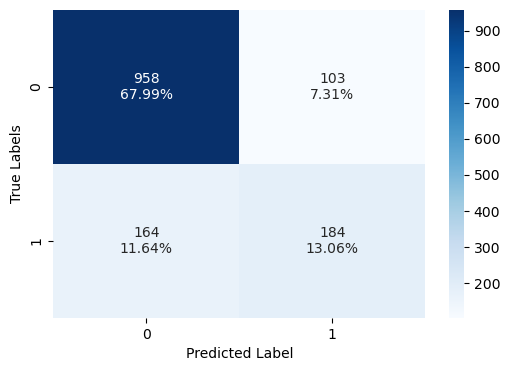

In [129]:
# create confusion matrix
cm = confusion_matrix(y_val,Algo_svc_pred)
labels = np.array(["{0:0.0f}\n{1:.2%}".format(item,item/cm.flatten().sum())for item in cm.flatten()]).reshape(2,2)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=labels,fmt="",cmap="Blues");
plt.ylabel("True Labels");
plt.xlabel("Predicted Label")
plt.show()

True Positive (TP): 67.99% - This means that 67.99% of actual positive instances (churn) were correctly classified as positive.
False Positive (FP): 7.31% - This means that 7.31% of actual negative instances (non-churn) were incorrectly classified as positive.
False Negative (FN): 11.64% - This means that 11.64% of actual positive instances (churn) were incorrectly classified as negative.
True Negative (TN): 13.06% - This means that 13.06% of actual negative instances (non-churn) were correctly classified as negative.

### HYPER PARAMETER OPTIMIZATION
### Here i will improve SVC model performance by by implementing and optimizing a Gradient boosting Regressor model


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score

# use a Gradientboosting Algorithm

Alg = GradientBoostingClassifier()

# Try this high parameter values

params = {"learning_rate":[0.1,0.5,1],"n_estimators":[50,100,150]}

# To find the best hyperparameter combination to optimize the R2 metric.

score = make_scorer(r2_score)
grid = GridSearchCV(Alg,params,scoring=score,cv=3)

grid.fit(x_train,y_train)

print("Best parameter combination",grid.best_params_,"\n")

# Measuring perfomance on test set

print("Applying best model on test data")

best_model = grid.best_estimator_
pred = best_model.predict(x_test)


print("Best parameter combination:",grid.best_params_,"\n")



C:\Users\ifeyi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ifeyi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ifeyi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ifeyi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ifeyi\anaconda

Best parameter combination {'learning_rate': 0.1, 'n_estimators': 50} 

Applying best model on test data
Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 



In [ ]:
dict(params)

In [ ]:
params = Alg.get_params()
params

In [78]:
# Evaluate the model using the test data
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1061
        True       0.62      0.50      0.55       348

    accuracy                           0.80      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



Optimized Gradient boosting model showed a lesser performance than SVC model. here we can  see an accuracy score of 80%,this model performed well with the customer negative attrition but performed poorly with the customer positive attrition.

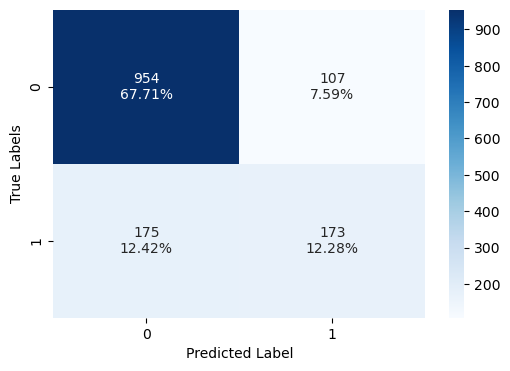

In [81]:
# create confusion metrix
cm = confusion_matrix(y_val,pred)

labels = np.array(["{0:0.0f}\n{1:.2%}".format(item,item/cm.flatten().sum()) for item in cm.flatten()]).reshape(2,2)



plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=labels,fmt="",cmap="Blues");
plt.ylabel("True Labels")
plt.xlabel("Predicted Label")
plt.show()

True Positive (TP): 67.71% - This means that 67.71% of actual positive instances (churn) were correctly classified as positive.

False Positive (FP): 7.79% - This means that 7.79% of actual negative instances (non-churn) were incorrectly classified as positive.

False Negative (FN): 12.42% - This means that 12.42% of actual positive instances (churn) were incorrectly classified as negative.

True Negative (TN): 12.28% - This means that 12.28% of actual negative instances (non-churn) were correctly classified as negative.

SVC Classifier model performed generally well than Gradient boosting model.    

Conclusion

In customer attrition prediction, precision, recall, and the ROC AUC score are vital metrics that provide great insights into model performance.

Precision: It indicates the proportion of true positive predictions among all positive predictions. In the context of customer attrition prediction, precision signifies the accuracy of identifying customers likely to churn. Higher precision means fewer false positives.

Recall: This metric measures the proportion of actual positives that were correctly identified by the model. In customer attrition prediction, recall captures the model's ability to correctly identify all customers who are actually churning. A higher recall implies fewer false negatives.

ROC AUC Score: The Receiver Operating Characteristic Area Under the Curve (ROC AUC) provides a comprehensive assessment of the model's performance across different thresholds. It balances the trade-off between true positive rate and false positive rate, offering a holistic view of model effectiveness.

In customer attrition prediction, a model with a high true positive rate (TPR) and a low false positive rate (FPR) is preferable. Such a model ensures accurate identification of customers at risk of churn while minimizing the misclassification of non-churning customers.